In [34]:
### Not for inclusion - just to load contents from previous notebook
import pandas as pd
pickle_path = 'data/pickle/'

to_pickle = ['data']
for item in to_pickle:
    exec(f'{item}=pd.read_pickle(\"{pickle_path}{item}.pkl\")')

# Project: Plotting

In the last lesson, we loaded the data we needed for reach of those as: `co2`, `income`, `pop` and `continents`. Now, we need to merge these into one `DataFrame` so that we can plot it. To refresh our memories, let's take a look at our four datasets that we need to merge together and think about how we will merge them:

In [35]:
data

,country,co2,income,population,continent
0,Afghanistan,0.254,2030.0,37200000.0,Asia
1,Angola,1.120,6930.0,30800000.0,Africa
2,Albania,1.590,13300.0,2880000.0,Europe
3,Andorra,6.120,58300.0,77000.0,Europe
4,United Arab Emirates,21.400,67000.0,9630000.0,Asia
...,...,...,...,...,...
188,Samoa,1.320,6390.0,196000.0,Asia
189,Yemen,0.356,2660.0,28500000.0,Asia
190,South Africa,8.100,13900.0,57800000.0,Africa
191,Zambia,0.302,3520.0,17400000.0,Africa


In [36]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt

Let's start with the simplest possible plot we could make here and we will take it, one step at a time, to make a progressively more complex plot. We'll start with using the `matplotlib` plotting tools, which are our standard go-to tools for plotting and will layer on complexity towards a fully interactive `altair`-based plot. 

For our first step, let's create a simple scatter plot from the data using `matplotlib`:

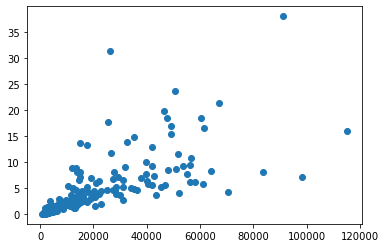

In [37]:
fig, ax = plt.subplots()
ax.scatter(x=data.income,
            y=data.co2)

Let's make sure we label our axes so that we know what we're plotting (this is always good visualization hygene):

[Text(0.5, 0, 'Income Per Capita (GDP per person in USD)'),
 Text(0, 0.5, 'Carbon Dioxide Emissions per person (metric tonnes)')]

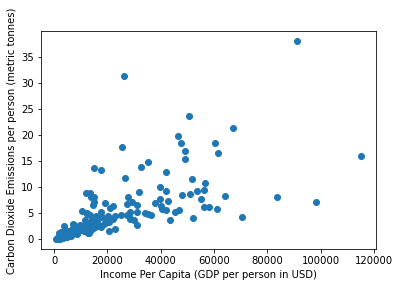

In [38]:
fig, ax = plt.subplots()
ax.scatter(
    x=data.income,
    y=data.co2
)
ax.set(
    xlabel='Income Per Capita (GDP per person in USD)',
    ylabel='Carbon Dioxide Emissions per person (metric tonnes)'
)


Next, a lot of the markers are overlapping one another in the lower left of the plot, so it's hard to see how many countries are represented there. Let's add transparency there using the `alpha` plotting keyword to make those points semi-transparent so we can read this more clearly

[Text(0.5, 0, 'Income Per Capita (GDP per person in USD)'),
 Text(0, 0.5, 'Carbon Dioxide Emissions per person (metric tonnes)')]

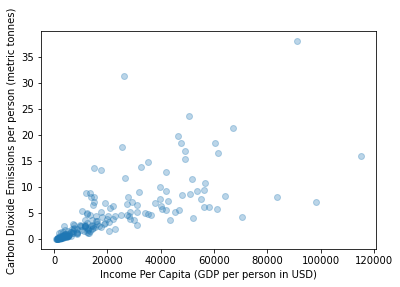

In [39]:
fig, ax = plt.subplots()
ax.scatter(
    x=data.income,
    y=data.co2,
    alpha=0.3
)
ax.set(
    xlabel='Income Per Capita (GDP per person in USD)',
    ylabel='Carbon Dioxide Emissions per person (metric tonnes)',
)

What's clear here is that many of the values are clumped together in the lower left. This makes this plot more difficult to read since one or two outliers in the data dominate the scale of the axes. Instead, lets set the scale to a logarithmic scale. With a log scale, instead of incrementing each tick as one unit at a time (1, 2, 3, 4, 5, ...) each tick of the plot jumps (typically) by a power of 10 (1, 10, 100, 1000, 10000, ...). This will help us see both the very small and the very large values more clearly. 

[Text(0.5, 0, 'Income Per Capita (GDP per person in USD)'),
 Text(0, 0.5, 'Carbon Dioxide Emissions per person (metric tonnes)'),
 None,
 None]

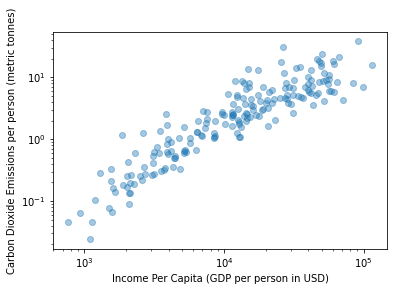

In [40]:
fig, ax = plt.subplots()
ax.scatter(
    x=data.income,
    y=data.co2,
    alpha=0.4
)
ax.set(
    xlabel='Income Per Capita (GDP per person in USD)',
    ylabel='Carbon Dioxide Emissions per person (metric tonnes)',
    xscale='log',
    yscale='log'
)

That is much easier to see the individual points in the plot, now. However, we haven't encoded the population of each country into the plot, yet. To do so, let's set the size based on the population. We can do this with the `s` keyword in the `scatter` method. However, we can't use raw population since that would create circles with a size in the billions - far too big to fit on the screen! However, if we scale that down by a factor of 500,000, that generally brings the values of the largest countries like China to less than 20. In practice, you often have to tweak the scales of these values to make it work for your data; in this case, dividing by 500,000 will do the trick.

[Text(0.5, 0, 'Income Per Capita (GDP per person in USD)'),
 Text(0, 0.5, 'Carbon Dioxide Emissions per person (metric tonnes)'),
 None,
 None]

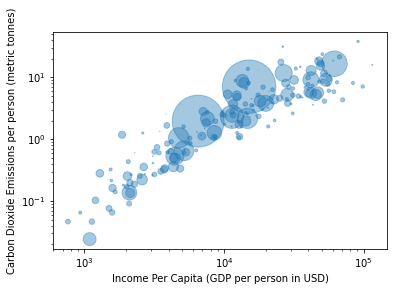

In [41]:
fig, ax = plt.subplots()
ax.scatter(
    x=data.income,
    y=data.co2,
    s=data.population/500000,
    alpha=0.4
)
ax.set(
    xlabel='Income Per Capita (GDP per person in USD)',
    ylabel='Carbon Dioxide Emissions per person (metric tonnes)',
    xscale='log',
    yscale='log'
)

We still have one more significant difference from this plot to the GapMinder plot; that is coloring the markers by the region of the world where each country/territory is located. Assigning those colors is a little tricky since 

In [42]:
region = ['Africa', 'Asia', 'Europe', 'Americas']
color = ['#00d5e9', '#ff5872', '#ffe700', '#84ec04']

color_list = []
for ir, r in enumerate(data.continent.values):
    for ireg, reg in enumerate(region):
        if r == reg:
            color_list.append(color[ireg])


[Text(0.5, 0, 'Income Per Capita (GDP per person in USD)'),
 Text(0, 0.5, 'Carbon Dioxide Emissions per person (metric tonnes)'),
 None,
 None]

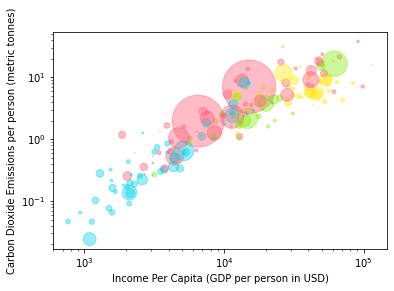

In [43]:
fig, ax = plt.subplots()
ax.scatter(
    x=data.income,
    y=data.co2,
    s=data.population/500000,
    alpha=0.4,
    color=color_list
)
ax.set(
    xlabel='Income Per Capita (GDP per person in USD)',
    ylabel='Carbon Dioxide Emissions per person (metric tonnes)',
    xscale='log',
    yscale='log'
)

Now lets add a black boundary to the marker. We can do this with the `edgecolors` property. We could feed in a color for each of the markers separately, but instead, we'll provide one color for all markers and make the edges black.

[Text(0.5, 0, 'Income Per Capita (GDP per person in USD)'),
 Text(0, 0.5, 'Carbon Dioxide Emissions per person (metric tonnes)'),
 None,
 None]

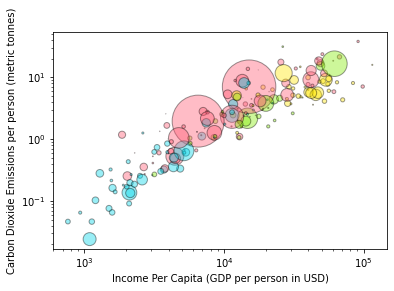

In [44]:
fig, ax = plt.subplots()
ax.scatter(
    x=data.income,
    y=data.co2,
    s=data.population/500000,
    alpha=0.4,
    color=color_list,
    edgecolors='black'
)
ax.set(
    xlabel='Income Per Capita (GDP per person in USD)',
    ylabel='Carbon Dioxide Emissions per person (metric tonnes)',
    xscale='log',
    yscale='log'
)

This plot is a bit too small at this point to really read well, so let's make it a bit larger. Let's set the figure size to be 10 inches by 10 inches using the `figsize` property of `plt.subplots()`

[Text(0.5, 0, 'Income Per Capita (GDP per person in USD)'),
 Text(0, 0.5, 'Carbon Dioxide Emissions per person (metric tonnes)'),
 None,
 None]

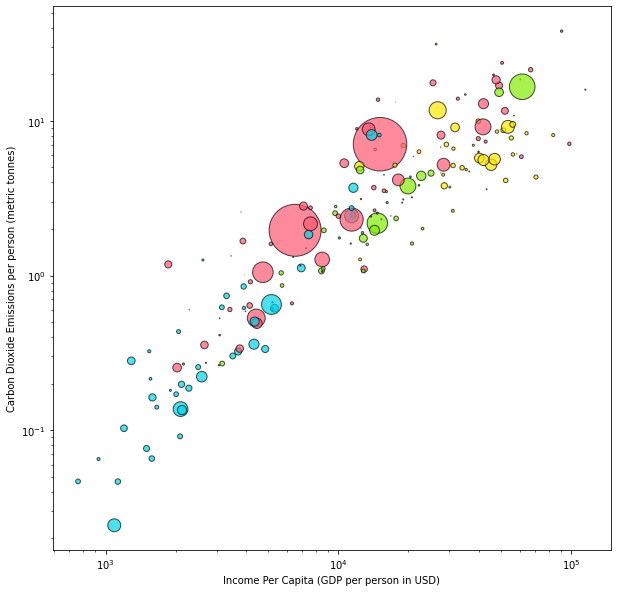

In [45]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(
    x=data.income,
    y=data.co2,
    s=data.population/500000,
    alpha=0.7,
    color=color_list,
    edgecolors='black'
)
ax.set(
    xlabel='Income Per Capita (GDP per person in USD)',
    ylabel='Carbon Dioxide Emissions per person (metric tonnes)',
    xscale='log',
    yscale='log'
)

Now this is quite close to what we want, but now that the plot is much bigger, the scale of the markers can be larger, so lets increase their size by changing how the `s` value is set, dividing it by 100,000 instead of 500,000. Let's also add in grid lines to make this plot easier to read - this can be done with the `ax.grid()` method, which adds the gridlines to the plot.

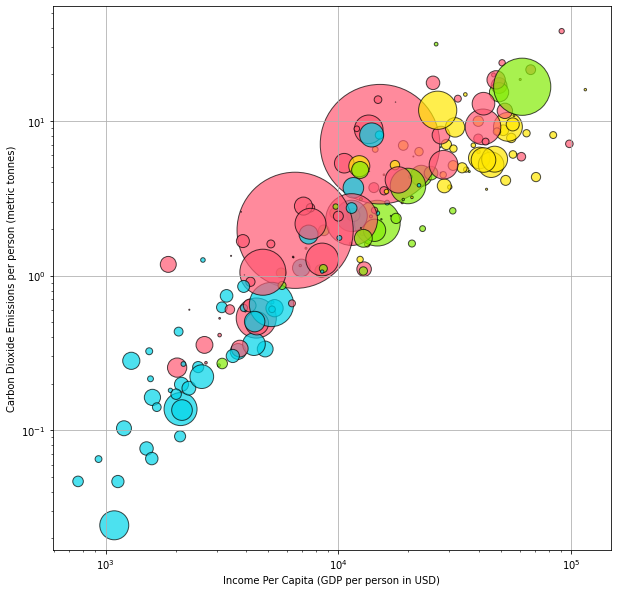

In [46]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(
    x=data.income,
    y=data.co2,
    s=data.population/100000,
    alpha=0.7,
    color=color_list,
    edgecolors='black',
)
ax.set(
    xlabel='Income Per Capita (GDP per person in USD)',
    ylabel='Carbon Dioxide Emissions per person (metric tonnes)',
    xscale='log',
    yscale='log',
)
ax.grid()


But we're still no quite there yet - the gridlines are only for the powers of 10: 100, 1,000, and 10,000 on the x-axis, for example. We can fix this by telling the grid method to not only use the major gridlines, but also the minor gridlines using hte `which='both'` property

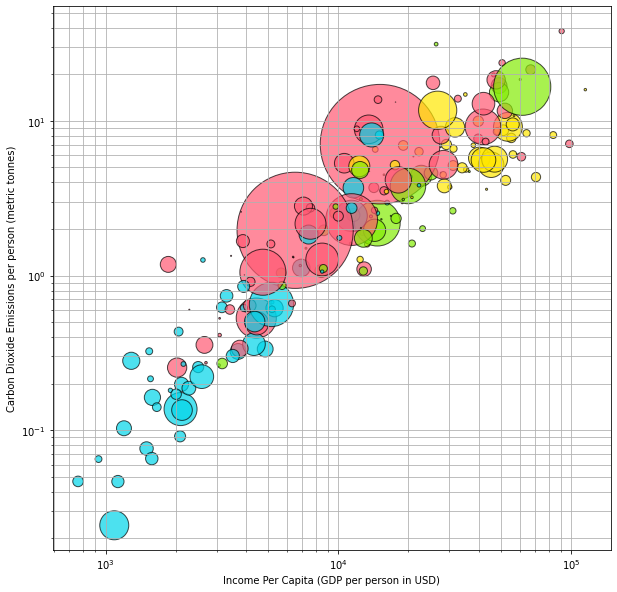

In [47]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(
    x=data.income,
    y=data.co2,
    s=data.population/100000,
    alpha=0.7,
    color=color_list,
    edgecolors='black',
)
ax.set(
    xlabel='Income Per Capita (GDP per person in USD)',
    ylabel='Carbon Dioxide Emissions per person (metric tonnes)',
    xscale='log',
    yscale='log',
)
ax.grid(True, which='both')


The grid lines are plotted in FRONT of our markers, though - this makes it harder to read. Let's move those back with `ax.set_axisbelow(True)`, which plots the axes and gridlines behind the markers

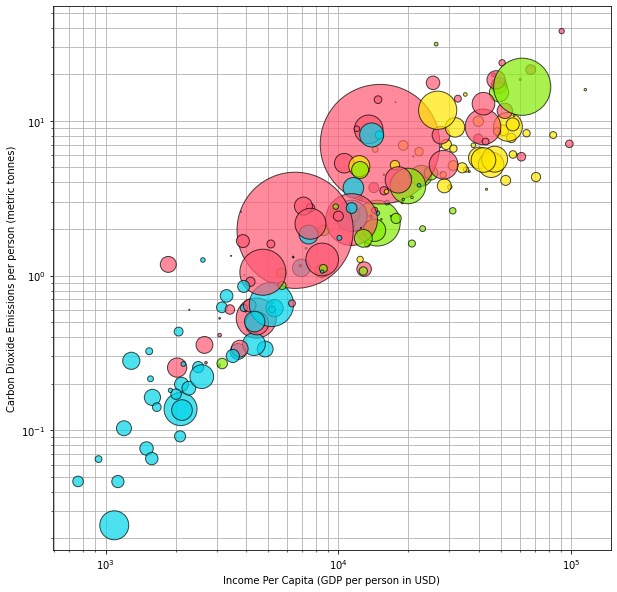

In [48]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(
    x=data.income,
    y=data.co2,
    s=data.population/100000,
    alpha=0.7,
    color=color_list,
    edgecolors='black',
)
ax.set(
    xlabel='Income Per Capita (GDP per person in USD)',
    ylabel='Carbon Dioxide Emissions per person (metric tonnes)',
    xscale='log',
    yscale='log',
)
ax.grid(which='both')
ax.set_axisbelow(True)

This is looking great, but we want this plot to be readily understood by a wide audience, so we really want all markings on the plot to be crystal clear to read. That leads to two more tweaks. First is that we need a legend for this plot, but using `ax.legend()` doesn't produce anything since we only used one set of scatterplot markers. Typically if we called the `scatter()` method on multiple datasets and plotted them each on the same set of axes, the `legend()` method would produce a nice legend entry for each time we called the `scatter()` method. In this case, since we only called `scatter()` once, we can't use this standard approach to create our legend. Fortunately, though, `matplotlib` is quite a versatile tool that allows you to create a custom legend.

To accomplish this we can create a custom legend by feeding in markers that are appropriate colored for each class, as shown in the example below:

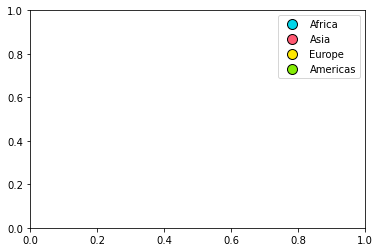

In [49]:
from matplotlib.lines import Line2D

region = ['Africa', 'Asia', 'Europe', 'Americas']
color = ['#00d5e9', '#ff5872', '#ffe700', '#84ec04']

legend_elements = []
for (r,c) in zip(region,color):
    legend_elements.append(
        Line2D(
            [0], [0],           # Coordinates of the item to plot (we leave this blank so it doesn't actually plot anything)
            linewidth=0,        # removes the line
            marker='o',         # Sets our plot to be a circle
            color='black',      # Sets the edge color of the marker
            label=r,            # The label we want for this legend entry
            markerfacecolor=c,  # The color of the inside of the marker
            markersize=10       # Pick a size the looks readable on the plot
        )
    )

# Create a sample figure to demonstrate the output of the legend() method
fig, ax = plt.subplots()
ax.legend(handles=legend_elements)

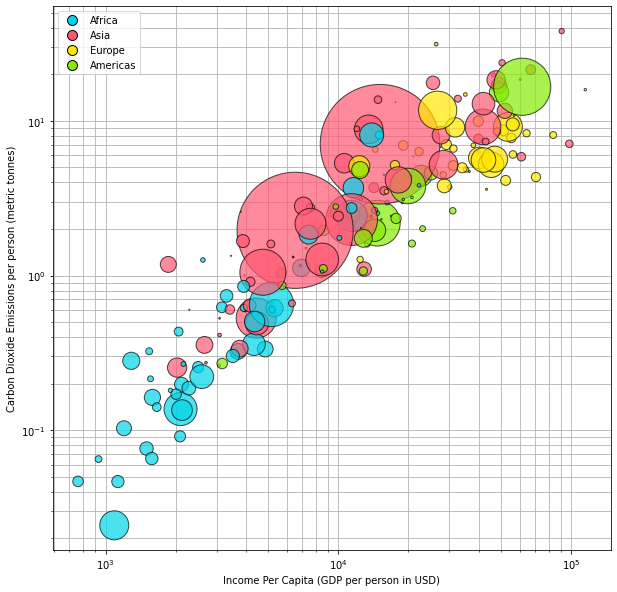

In [50]:
fig, ax = plt.subplots(figsize=(10,10))
z = ax.scatter(
    x=data.income,
    y=data.co2,
    s=data.population/100000,
    alpha=0.7,
    color=color_list,
    edgecolors='black',
)
ax.set(
    xlabel='Income Per Capita (GDP per person in USD)',
    ylabel='Carbon Dioxide Emissions per person (metric tonnes)',
    xscale='log',
    yscale='log',
)
ax.grid(which='both')
ax.set_axisbelow(True)
ax.legend(handles=legend_elements)

The other issue here is that exponential notation on the labels may not be that easy for all readers to understand

# Making the plot interactive through `altair`

In [52]:
# MAIN PLOT
# Create the plot with Altair
domain = ['Africa', 'Asia', 'Europe', 'Americas']
range_ = ['#00d5e9', '#ff5872', '#ffe700', '#84ec04']

chart = alt.Chart(data).mark_circle(
    size=60,
    stroke='black',
    strokeWidth=1
).encode(
    x=alt.X('income',
            scale=alt.Scale(type="log"),
            title='Income Per Capita (GDP per person in USD)'),
    y=alt.Y('co2',
            scale=alt.Scale(type="log"),
            title='Carbon Dioxide Emissions per person (metric tonnes)'),
    color=alt.Color('continent', 
                    scale=alt.Scale(domain=domain, range=range_),
                    title='Region'),
    size=alt.Size('population', 
                  scale=alt.Scale(range=[50, 8000]),
                  title='Population'),
    tooltip=[alt.Tooltip('country',title='Territory'), 
             alt.Tooltip('income',title='GDP per capita ($)'),
             alt.Tooltip('co2',title='CO2 per capita (tonnes)'),
             alt.Tooltip('continent',title='Region')]
).configure_mark(
    opacity=0.7,
).properties(
    width=500,
    height=500
).interactive()

chart.configure_legend(
    tickCount=3,
    symbolFillColor='lightgrey'
)

alt.Chart(...)